In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
df =  pd.read_csv("C:\\Users\\ASUS\\DM\\BreastCancerData.csv")
df.head(10)

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,cell_size_single_epithelial,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [7]:
abc = df.columns.values.tolist()[1:-1]
print(abc)

['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity', 'marginal_adhesion', 'cell_size_single_epithelial', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']


In [6]:
col=df.columns.tolist()[1:]
print(df[col[9]])

0      0
1      0
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     0
20     1
21     1
22     0
23     1
24     0
25     1
26     0
27     0
28     0
29     0
      ..
669    1
670    1
671    0
672    0
673    0
674    0
675    0
676    0
677    0
678    0
679    0
680    1
681    1
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
690    0
691    1
692    0
693    0
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
clump_thickness                699 non-null int64
cell_size_uniformity           699 non-null int64
cell_shape_uniformity          699 non-null int64
marginal_adhesion              699 non-null int64
cell_size_single_epithelial    699 non-null int64
bare_nuclei                    699 non-null int64
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


# Tính các giá trị cơ bản

In [8]:
#Tính mean
col=df.columns.tolist()[1:]
mean_df = df[col].sum() / len(df)
#print(mean_df)

y = df.columns
def calculate_median(data):
    new_list = sorted(data)
    if len(new_list)%2:
      return new_list[len(new_list)//2]
    else:
      return (new_list[(len(new_list)/2)] + new_list[(len(new_list)/2)-1]) /2.0
#Tính median
median_df = []
col=df.columns.tolist()[1:]
for i in df.columns.tolist()[1:] : 
    median_df.append(calculate_median(df[i]))
#print(median_df)
#Tính phương sai
col=df.columns.tolist()[1:]
variance_df = []
for i in df.columns.tolist()[1:] : 
    variance_df.append(((df[i]-mean_df[i])**2).sum(axis=0) / (len(df)-1))
#print(variance_df)
#TÍnh độ lệch chuẩn
std_df = np.sqrt(variance_df)
#print(std_df)


#describe = ['mean' , 'std' , 'min' , 'max' , 'medium', 'variance' , 'std' , 'corr']
describe_df = pd.DataFrame({'mean' : mean_df ,'median' : median_df, 'variance': variance_df , 'std' : std_df  })
print(describe_df)



                                 mean  median   variance       std
clump_thickness              4.417740       4   7.928395  2.815741
cell_size_uniformity         3.134478       1   9.311403  3.051459
cell_shape_uniformity        3.207439       1   8.832265  2.971913
marginal_adhesion            2.806867       1   8.153191  2.855379
cell_size_single_epithelial  3.216023       2   4.903124  2.214300
bare_nuclei                  3.486409       1  13.118368  3.621929
bland_chromatin              3.437768       3   5.945620  2.438364
normal_nucleoli              2.866953       1   9.324680  3.053634
mitoses                      1.589413       1   2.941492  1.715078
class                        0.344778       0   0.226230  0.475636


# Tính tương quan 

,name,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,cell_size_single_epithelial,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,clump_thickness,1.0,0.6,0.7,0.5,0.5,0.6,0.6,0.5,0.4,0.7
1,cell_size_uniformity,0.6,1.0,0.9,0.7,0.8,0.7,0.8,0.7,0.5,0.8
2,cell_shape_uniformity,0.7,0.9,1.0,0.7,0.7,0.7,0.7,0.7,0.4,0.8
3,marginal_adhesion,0.5,0.7,0.7,1.0,0.6,0.7,0.7,0.6,0.4,0.7
4,cell_size_single_epithelial,0.5,0.8,0.7,0.6,1.0,0.6,0.6,0.6,0.5,0.7
5,bare_nuclei,0.6,0.7,0.7,0.7,0.6,1.0,0.7,0.6,0.3,0.8
6,bland_chromatin,0.6,0.8,0.7,0.7,0.6,0.7,1.0,0.7,0.3,0.8
7,normal_nucleoli,0.5,0.7,0.7,0.6,0.6,0.6,0.7,1.0,0.4,0.7
8,mitoses,0.4,0.5,0.4,0.4,0.5,0.3,0.3,0.4,1.0,0.4
9,class,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.7,0.4,1.0


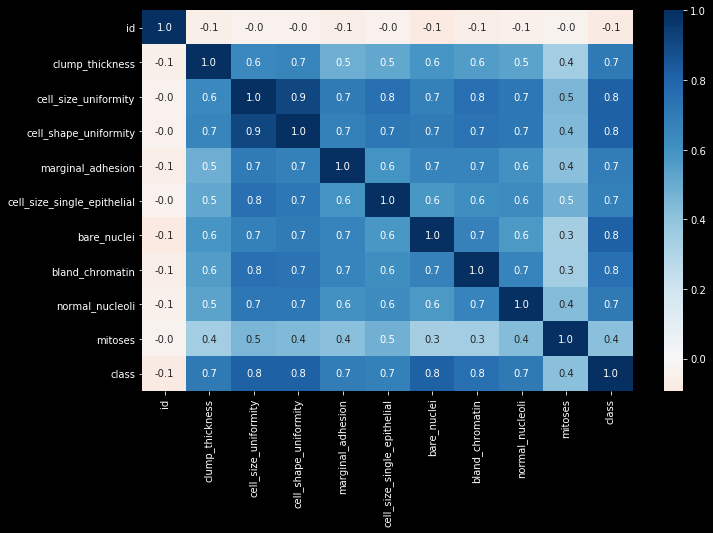

In [9]:
from matplotlib import style
style.use('dark_background')
def vitri(a,b):
    for i in range(len(a)):
        if b==a[i] :
            vitrii=i
    return vitrii


#Tinh r tương quan
col=df.columns.tolist()[1:]
r = []
for i in col:
    cov = []*len(col)
    for j in col:
        cov.append(((df[i] - mean_df[i])*(df[j] - mean_df[j])).sum(axis=0)/(len(df) - 1))
    tam = vitri(col,i)
    for k in range(len(col)):
        r.append(round(cov[k]/(std_df[tam]*std_df[k]),1))
#print(r)
r_df = [[]]
for i in range(len(col)):
    r_df[0].append(r[0:10])
    del r[0:10]
#print(r_df)
df_r1 = pd.DataFrame({'name' : col , 'clump_thickness' : r_df[0][0] ,'cell_size_uniformity' : r_df[0][1] , 'cell_shape_uniformity' : r_df[0][2] ,'marginal_adhesion' : r_df[0][3] ,'cell_size_single_epithelial' : r_df[0][4] ,'bare_nuclei ' : r_df[0][5] , 'bland_chromatin' : r_df[0][6] ,'normal_nucleoli ' : r_df[0][7],'mitoses' : r_df[0][8] ,'class' : r_df[0][9]  })

# Tương quan
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
df_r1.head(10)

In [10]:
class LR:

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def loss_function(self, y_pred, y_test):
        return - np.sum(y_test * np.log(y_pred)  + (1 - y_test)*np.log(1 - y_pred))
        
    def fit(self, X, y, epochs = 30, tol=1e-4, learning_rate = 0.05):
        X = np.array(X)
        y = np.array(y)
        num_attr = X.shape[1]
        m = X.shape[0]
        self.weights = np.random.randn(num_attr + 1, 1)
        ones = np.ones([m, 1])
        X = np.concatenate((ones, X), axis = 1)
        y.shape = (y.size, 1)
        a = []
        for i in range(epochs):
            z = np.dot(X, self.weights)
            z = self.sigmoid(z)            
            grad = np.zeros([num_attr + 1, 1])
            for j in range(num_attr + 1):    
                b = X.T[j]
                b.shape = (b.size, 1)
                grad[j] = np.sum((z - y) * b) 
            self.weights = self.weights - learning_rate*grad
           
        print(self.weights)
            
    def predict(self, data, threshold = 0.5):
         m = data.shape[0]
         ones = np.ones([m, 1])
         data = np.concatenate((ones, data), axis = 1)
         z = np.dot(data, self.weights)
         z = self.sigmoid(z)
         predict = np.uint8(np.zeros(z.shape))
         for i in range(z.shape[0]):
             if(z[i] >= threshold):  
                 predict[i] = 1
         return predict

In [11]:
if __name__ == '__main__':
    
    train_class = df.columns.values.tolist()[1:-1]
    train, test = train_test_split(df, test_size = 0.3) 

    train_X = train[train_class]    
    train_Y = train['class']
    test_X = test[train_class]
    test_Y = test['class']

    a = LR()
    a.fit(train_X, train_Y, epochs = 200, learning_rate = 0.25)
    
    
    predictions_test = a.predict(test_X)
    accuracy_test = metrics.accuracy_score(predictions_test, test_Y)
    f1_score_test = metrics.f1_score(predictions_test, test_Y)
    precision_test = metrics.precision_score(predictions_test, test_Y)
    recall_test = metrics.recall_score(predictions_test, test_Y)

    print("Accuracy: ", accuracy_test)
    print("F1 score: ", f1_score_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    

[[-1004.61154064]
 [   48.12295393]
 [   76.22741093]
 [   42.59123486]
 [   10.22257462]
 [  -19.38268921]
 [   45.89381287]
 [   18.8841438 ]
 [   14.72522385]
 [   22.97674254]]
Accuracy:  0.9761904761904762
F1 score:  0.9655172413793103
Precision:  0.9859154929577465
Recall:  0.9459459459459459


In [12]:
train = train.reset_index()
train.drop(["id","index"],axis=1,inplace=True)
print(train)

     clump_thickness  cell_size_uniformity  cell_shape_uniformity  \
0                  5                     5                      5   
1                  1                     1                      1   
2                  5                     5                      7   
3                  5                     3                      3   
4                  4                     2                      1   
5                 10                    10                     10   
6                  5                    10                      6   
7                  1                     1                      1   
8                  3                     3                      5   
9                  5                     1                      1   
10                10                     8                     10   
11                10                     7                      7   
12                 5                     7                     10   
13                 8              

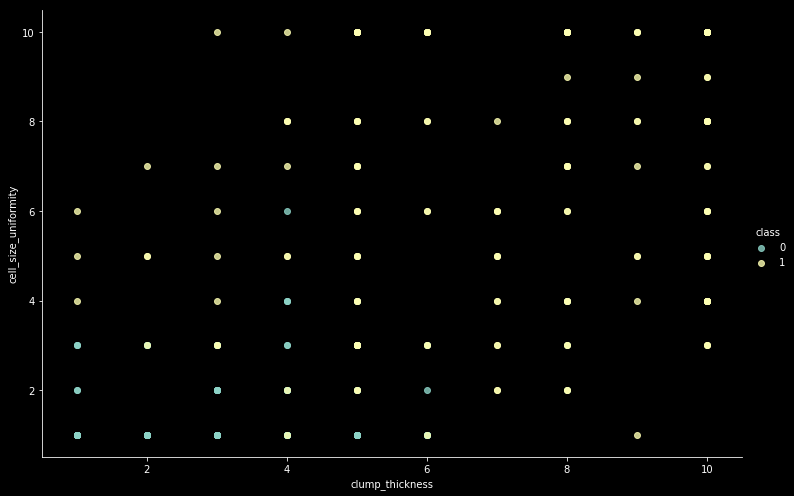

In [13]:
import seaborn as sns
sns.lmplot(data=train,x="clump_thickness",y="cell_size_uniformity",hue="class",fit_reg=False,height=7,aspect=1.5)